# EDA for Flipping / No Flipping Image Classification
This notebook performs Exploratory Data Analysis (EDA) on the image dataset for the task of classifying images as 'flipping' or 'no flipping'.
## Outline
1. Import Required Libraries
2. Load Image Dataset Structure
3. Visualize Sample Images
4. Analyze Image Dimensions and Channels
5. Check Class Distribution
6. Visualize Image Augmentations (Flipping/No Flipping)

# Import Required Libraries


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load Image Dataset Structure


In [2]:
def print_dir_structure(root_dir, indent=0):
    for item in os.listdir(root_dir):
        path = os.path.join(root_dir, item)
        print("    " * indent + "|-- " + item)
        if os.path.isdir(path):
            print_dir_structure(path, indent + 1)


print("Training Directory Structure:")
print_dir_structure("images/training")
print("\nTesting Directory Structure:")
print_dir_structure("images/testing")

Training Directory Structure:
|-- flip
    |-- 0001_000000010.jpg
    |-- 0001_000000011.jpg
    |-- 0001_000000012.jpg
    |-- 0001_000000013.jpg
    |-- 0001_000000014.jpg
    |-- 0001_000000015.jpg
    |-- 0001_000000016.jpg
    |-- 0001_000000017.jpg
    |-- 0001_000000018.jpg
    |-- 0001_000000019.jpg
    |-- 0001_000000021.jpg
    |-- 0001_000000022.jpg
    |-- 0001_000000023.jpg
    |-- 0001_000000024.jpg
    |-- 0001_000000025.jpg
    |-- 0002_000000009.jpg
    |-- 0002_000000010.jpg
    |-- 0002_000000011.jpg
    |-- 0002_000000014.jpg
    |-- 0002_000000016.jpg
    |-- 0002_000000018.jpg
    |-- 0002_000000019.jpg
    |-- 0002_000000020.jpg
    |-- 0002_000000021.jpg
    |-- 0003_000000001.jpg
    |-- 0003_000000002.jpg
    |-- 0003_000000003.jpg
    |-- 0003_000000004.jpg
    |-- 0003_000000006.jpg
    |-- 0003_000000007.jpg
    |-- 0003_000000009.jpg
    |-- 0003_000000010.jpg
    |-- 0003_000000011.jpg
    |-- 0003_000000012.jpg
    |-- 0003_000000013.jpg
    |-- 0003_000

# Visualize Sample Images


Training Samples:


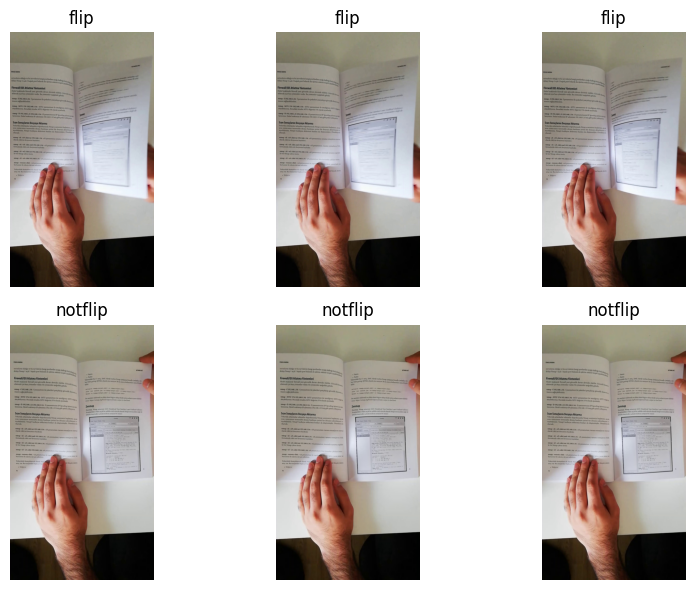

Testing Samples:


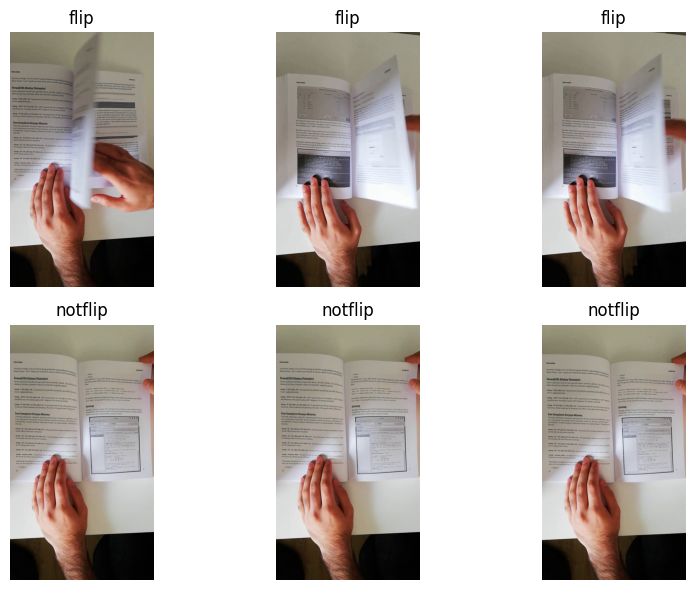

In [3]:
def show_samples(base_dir, class_names, n_samples=3):
    plt.figure(figsize=(n_samples * 3, 6))
    for idx, class_name in enumerate(class_names):
        class_dir = os.path.join(base_dir, class_name)
        images = os.listdir(class_dir)[:n_samples]
        for i, img_name in enumerate(images):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(2, n_samples, idx * n_samples + i + 1)
            plt.imshow(img)
            plt.title(f"{class_name}")
            plt.axis("off")
    plt.tight_layout()
    plt.show()


print("Training Samples:")
show_samples("images/training", ["flip", "notflip"])
print("Testing Samples:")
show_samples("images/testing", ["flip", "notflip"])

# Analyze Image Dimensions and Channels


In [4]:
def analyze_image_shapes(base_dir, class_names):
    shapes = []
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                shapes.append(img.shape)
    shapes = np.array(shapes)
    print("Image shape summary:")
    print("Min shape:", shapes.min(axis=0))
    print("Max shape:", shapes.max(axis=0))
    print("Mean shape:", shapes.mean(axis=0))


print("Training set:")
analyze_image_shapes("images/training", ["flip", "notflip"])
print("Testing set:")
analyze_image_shapes("images/testing", ["flip", "notflip"])

Training set:
Image shape summary:
Min shape: [1920 1080    3]
Max shape: [1920 1080    3]
Mean shape: [1920. 1080.    3.]
Testing set:
Image shape summary:
Min shape: [1920 1080    3]
Max shape: [1920 1080    3]
Mean shape: [1920. 1080.    3.]


# Check Class Distribution


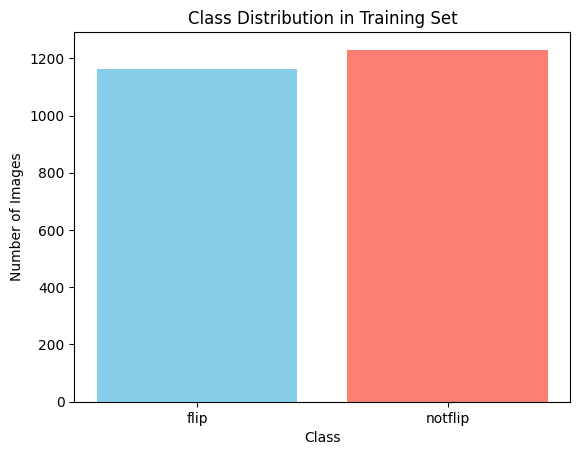

{'flip': 1162, 'notflip': 1230}


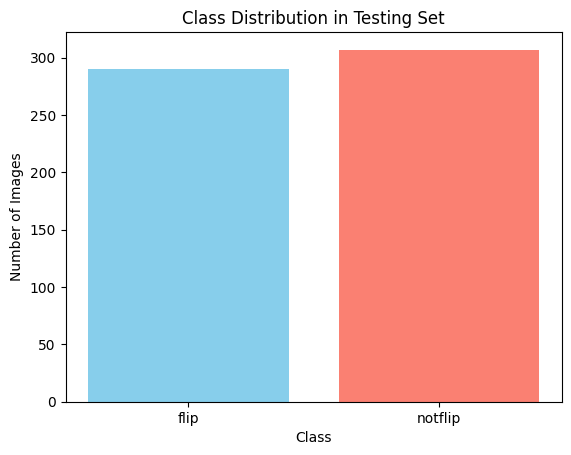

{'flip': 290, 'notflip': 307}


In [5]:
def plot_class_distribution(base_dir, class_names, set_name):
    counts = {}
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    plt.bar(counts.keys(), counts.values(), color=["skyblue", "salmon"])
    plt.title(f"Class Distribution in {set_name} Set")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.show()
    print(counts)


plot_class_distribution("images/training", ["flip", "notflip"], "Training")
plot_class_distribution("images/testing", ["flip", "notflip"], "Testing")

# Visualize Image Augmentations (Flipping/No Flipping)



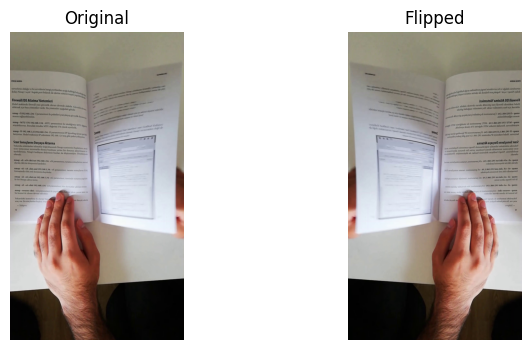

In [6]:
def show_flipping_example(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_flip = cv2.flip(img_rgb, 1)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(img_flip)
    plt.title("Flipped")
    plt.axis("off")
    plt.show()


# Show example from training set (flip class)
sample_flip = os.listdir("images/training/flip")[0]
show_flipping_example(os.path.join("images/training/flip", sample_flip))